This notebook demonstrates the usage of LaplaceInterploation.jl for interpolating missing data in 1D, 2D, and 3D problems. The package implements an approximate Laplace interpolation [@press1992] when no parameters are given, and when parameters $m\in\mathbb{Z}$ and $\epsilon > 0$ are set, the interpolant approximates a Mat`ern kernel, of which radial basis functions and polyharmonic splines are a special case. When all the data on the boundaries are known, the package automatically enforces a Dirichlet boundary condition. When the data on the boundaries are unknown, the package provides an option of implementing either Neumann boundary conditions -- that is, the derivative of the function at the unknown boundaries is 0 [cite Strikwerda or any other FDM text], or by approximating the boundary node as the average of all the neighboring nodes. We refer to the latter as "Do Nothing" boundary conditions.

In [20]:
using LaplaceInterpolation
using Plots, Random

In [9]:
function f(x)
    return x .* sin.(x)
end

f (generic function with 1 method)

# Generating synthetic data

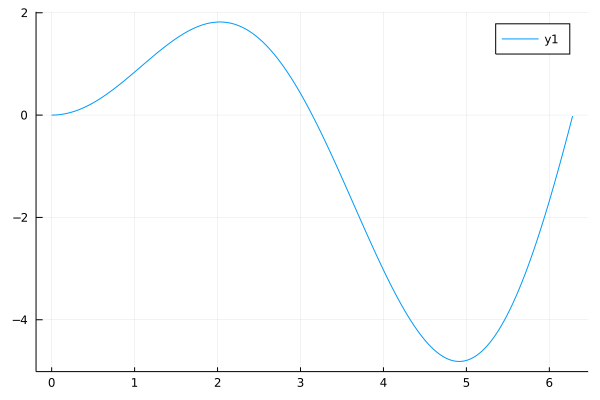

In [18]:
h = 0.01
x = 0:h:2*pi
y = f(x)
no_of_gridpoints = length(x) 
plot(x,y)

# Dirichlet Boundaries

We will discard about 90% of the points. We also want to ensure that we do not discard the boundaries -- that is to ensure the values at the boundaries are specified.

In [23]:
rng = MersenneTwister(1234);
discard = randsubseq(rng, 2:no_of_gridpoints-1, 0.9) 
incomplete_data = copy(y)
incomplete_data[discard].=-5; #We assign -5 (or any arbitrary value) to missing data.

# 1D Interpolation (both Laplace and Matern)

In [36]:
m = 1
epsilon = 0
restored_data_laplace = matern_1d_grid(incomplete_data, discard, m, epsilon, h);
#Dirichlet boundaries are implemented by default.

# Reconstruction Errors

In [29]:
error_lap = abs.(restored_data_laplace .- y);
rel_error_lap = abs.((restored_data_laplace .- y) ./ (y .+ 1e-10));

# Plotting

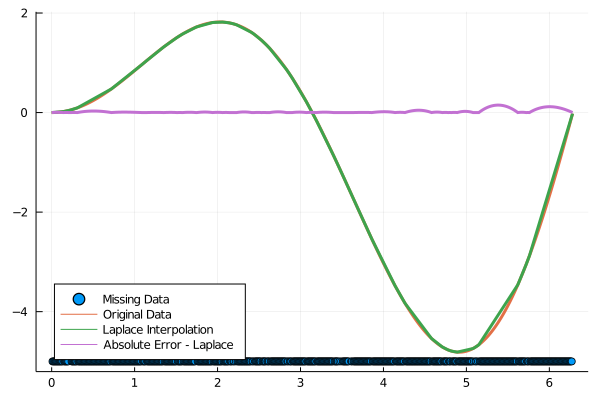

In [35]:
Plot_Matrix = [y, restored_data_laplace, error_lap]
Plots.plot(x[discard], incomplete_data[discard], seriestype = :scatter, label = "Missing Data")
Plots.plot!(x, Plot_Matrix, labels=["Original Data" "Laplace Interpolation" "Absolute Error - Laplace" ], 
    legend=:bottomleft, lw = 3)
#png("1D_MaternInterpolation.png")



# Neumann Boundaries

When the boundary nodes are unknown, we enforce a zero Neumann boundary condition -- that is the derivative of the function along the outward normal at the boundaries is 0. In 1D, $\displaystyle \frac{\partial f}{\partial x} = 0$ at the end points.

In [60]:
rng = MersenneTwister(12345);
discard = randsubseq(rng, 2:no_of_gridpoints-1, 0.9) 
discard = [1; discard; no_of_gridpoints]; # we are including the boundaries in the set of discarded nodes.
incomplete_data = copy(y)
incomplete_data[discard].=-5; #We assign -5 (or any arbitrary value) to missing data.

# Interpolation

In [68]:
m = 1
epsilon = 0
bc = 1 #Setting Neumann Boundaries
restored_data_laplace = matern_1d_grid(incomplete_data, discard, m, epsilon, h, bc); 
#Dirichlet boundaries are implemented by default.

In [69]:
error_lap = abs.(restored_data_laplace .- y);
rel_error_lap = abs.((restored_data_laplace .- y) ./ (y .+ 1e-10));

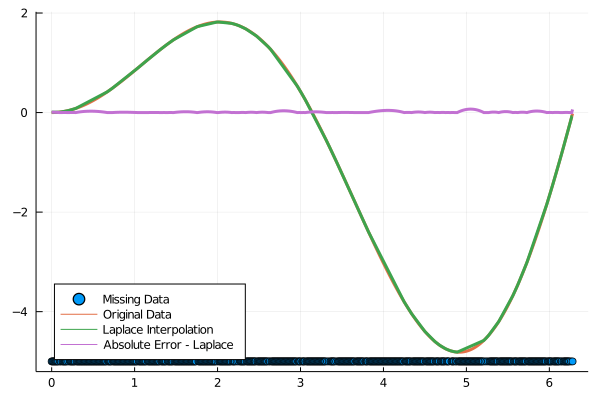

In [70]:
Plot_Matrix = [y, restored_data_laplace, error_lap]
Plots.plot(x[discard], incomplete_data[discard], seriestype = :scatter, label = "Missing Data")
Plots.plot!(x, Plot_Matrix, labels=["Original Data" "Laplace Interpolation" "Absolute Error - Laplace" ], 
    legend=:bottomleft, lw = 3)
#png("1D_MaternInterpolation.png")

# Do Nothing Boundaries
When the boundary nodes are unknown, we approximate the unknown boundary values as the average of their neighbors.
For example in 1D, $f_0 = f_1$ and $f_N = f_{N-1}$. In 2D, $\displaystyle f_{0,0} = \frac{f_{1,0} + f_{0,1}}{2}$ and  $\displaystyle f_{1,0} = \frac{f_{0,0} + f_{2,0} +f_{1,1}}{3}$. 

In [71]:
rng = MersenneTwister(12345);
discard = randsubseq(rng, 2:no_of_gridpoints-1, 0.9) 
discard = [1; discard; no_of_gridpoints]; # we are including the boundaries in the set of discarded nodes.
incomplete_data = copy(y)
incomplete_data[discard].=-5; #We assign -5 (or any arbitrary value) to missing data.

# Interpolation

In [72]:
m = 1
epsilon = 0
bc = 1 #Setting Neumann Boundaries
restored_data_laplace = matern_1d_grid(incomplete_data, discard, m, epsilon, h, bc); 
#Dirichlet boundaries are implemented by default.

In [73]:
error_lap = abs.(restored_data_laplace .- y);
rel_error_lap = abs.((restored_data_laplace .- y) ./ (y .+ 1e-10));

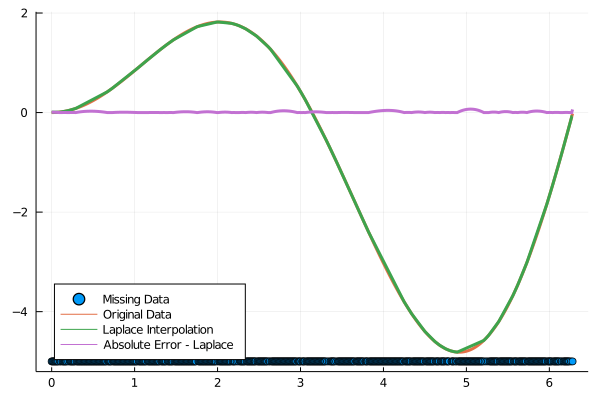

In [74]:
Plot_Matrix = [y, restored_data_laplace, error_lap]
Plots.plot(x[discard], incomplete_data[discard], seriestype = :scatter, label = "Missing Data")
Plots.plot!(x, Plot_Matrix, labels=["Original Data" "Laplace Interpolation" "Absolute Error - Laplace" ], 
    legend=:bottomleft, lw = 3)
#png("1D_MaternInterpolation.png")

